

# Exploratory Data Analysis - Terrorism

##Problem Statement

The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset
to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover
trends, identify high-risk regions, understand attack characteristics, and potentially reveal
factors that contribute to terrorist activities.

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading the dataset
path ='/content/drive/MyDrive/Datasets/globalterrorismdb_0718dist.csv'
df= pd.read_csv(path, encoding ="ISO-8859-1" )

## Exploratory Data Analysis

In [4]:
#Check the first 5 samples
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#Check the last 5 samples
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
##Check the dimentions of the dataset
df.shape

(181691, 135)

In [7]:
#Checkk the characteristics of the datset
pd.set_option('display.max_info_columns', 1000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

**Insights**

1. **Size**: The dataset is quite extensive, with 181,691 entries and 135 columns.

2. **Time Info**: It covers various years and has temporal details like the incident's year, month, and day.

3. **Location**: It provides geographic information, including the country and region.

4. **Event ID**: Each incident has a unique identifier (eventid).

5. **Incident Types**: Different types of attacks are documented, along with their details.

6. **Targets**: Information about the attack's target, including details, is available.

7. **Perpetrators**: The dataset lists the responsible group's name, and there's data on multiple perpetrators.

8. **Casualties**: Details on casualties (killed and wounded) and the number of perpetrators are included.

9. **Claims and Ransom**: Data related to claims and ransom payments can be studied.

10. **Data Sources**: The source of the data (dbsource) is indicated, which helps understand data collection methods.


In [8]:
#Let's drop the columns that are not needed for analyhsis here, keep only selected
df = df[['eventid','iyear','imonth','iday','approxdate','extended','country','country_txt','region','latitude','longitude','city','specificity','crit1','targtype1','weapsubtype1_txt']]


In [9]:
#Creating Numerical columns
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['eventid'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'region', 'latitude',
       'longitude', 'specificity', 'crit1', 'targtype1'],
      dtype='object') 11


In [10]:
#Categorical features
df_cat = df.select_dtypes(include = ['object'])
print(df_cat.columns, len(list(df_cat.columns.values)))


Index(['approxdate', 'country_txt', 'city', 'weapsubtype1_txt'], dtype='object') 4


In [11]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,crit1,targtype1
count,181691.00,181691.00,181691.00,181691.00,181691.00,181691.00,181691.00,177135.00,177134.00,181685.00,181691.00,181691.00
mean,200270523949.25,2002.64,6.47,15.51,0.05,131.97,7.16,23.50,-458.70,1.45,0.99,8.44
std,1325957057.16,13.26,3.39,8.81,0.21,112.41,2.93,18.57,204778.99,1.00,0.11,6.65
min,197000000001.00,1970.00,0.00,0.00,0.00,4.00,1.00,-53.15,-86185896.00,1.00,0.00,1.00
25%,199102060003.50,1991.00,4.00,8.00,0.00,78.00,5.00,11.51,4.55,1.00,1.00,3.00
50%,200902230001.00,2009.00,6.00,15.00,0.00,98.00,6.00,31.47,43.25,1.00,1.00,4.00
75%,201408090035.50,2014.00,9.00,23.00,0.00,160.00,10.00,34.69,68.71,1.00,1.00,14.00
max,201712310032.00,2017.00,12.00,31.00,1.00,1004.00,12.00,74.63,179.37,5.00,1.00,22.00


In [12]:
#Descriptive summary of categorical columns
display(round(df_cat.describe(),2))

,approxdate,country_txt,city,weapsubtype1_txt
count,9239,181691,181257,160923
unique,2244,205,36674,30
top,"September 18-24, 2016",Iraq,Unknown,Unknown Explosive Type
freq,101,24636,9775,44980


### Lets check each Colums

In [13]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.isnull().sum()


eventid                  0
iyear                    0
imonth                   0
iday                     0
approxdate          172452
extended                 0
country                  0
country_txt              0
region                   0
latitude              4556
longitude             4557
city                   434
specificity              6
crit1                    0
targtype1                0
weapsubtype1_txt     20768
dtype: int64

In [14]:
#%OF NULL
nan_per = [(c, df[c].isna().mean()*100) for c in df]
nan_per = pd.DataFrame(nan_per, columns=["column_name", "Percentage"])
nan_per


,column_name,Percentage
0,eventid,0.00
1,iyear,0.00
2,imonth,0.00
3,iday,0.00
4,approxdate,94.91
5,extended,0.00
6,country,0.00
7,country_txt,0.00
8,region,0.00
9,latitude,2.51


In [15]:
df.duplicated().sum()


0

In [16]:
#Affected
affected = df[['region','specificity','targtype1']]
affected = affected.groupby(by=['region']).sum().reset_index().sort_values(by=['targtype1'], ascending = False)
affected


,region,specificity,targtype1
9,10,67077.00,451594
5,6,72561.00,399776
10,11,25441.00,159391
2,3,28309.00,155745
7,8,19205.00,113044
4,5,21737.00,94059
1,2,16917.00,86150
8,9,6535.00,38042
0,1,3688.00,22617
3,4,1115.00,6891


In [17]:
#value count by country
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.country_txt.value_counts()


Iraq                                24636
Pakistan                            14368
Afghanistan                         12731
India                               11960
Colombia                             8306
Philippines                          6908
Peru                                 6096
El Salvador                          5320
United Kingdom                       5235
Turkey                               4292
Somalia                              4142
Nigeria                              3907
Thailand                             3849
Yemen                                3347
Spain                                3249
Sri Lanka                            3022
United States                        2836
Algeria                              2743
France                               2693
Egypt                                2479
Lebanon                              2478
Chile                                2365
Libya                                2249
West Bank and Gaza Strip          

## Visualizatiion


In [18]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)

    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )

    plt.show()


Description of iyear
----------------------------------------------------------------------------
count   181691.00
mean      2002.64
std         13.26
min       1970.00
25%       1991.00
50%       2009.00
75%       2014.00
max       2017.00
Name: iyear, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


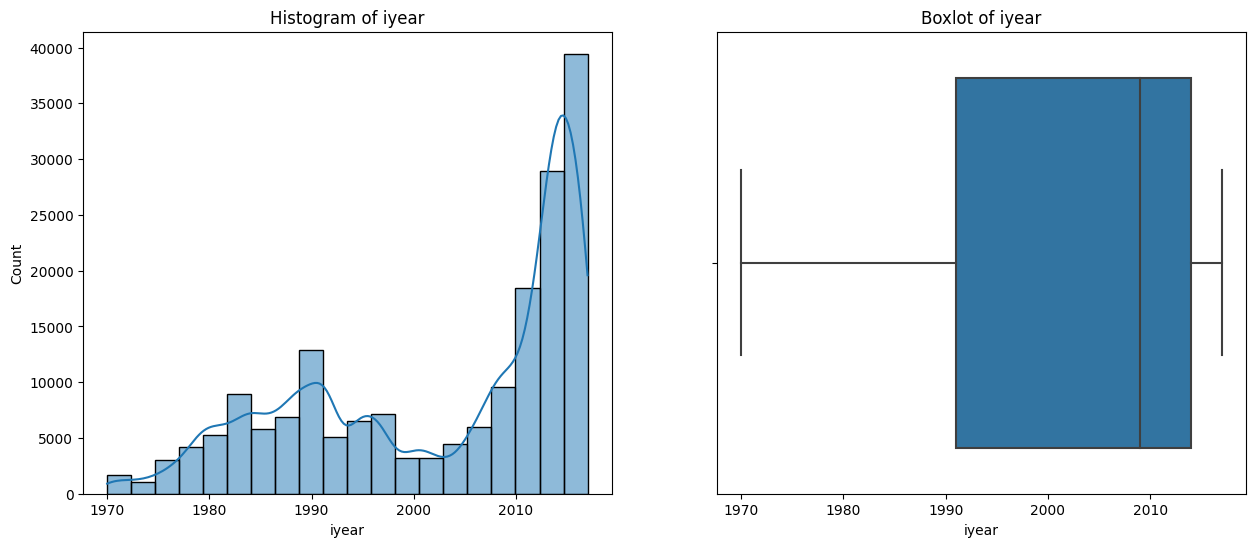

Description of imonth
----------------------------------------------------------------------------
count   181691.00
mean         6.47
std          3.39
min          0.00
25%          4.00
50%          6.00
75%          9.00
max         12.00
Name: imonth, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


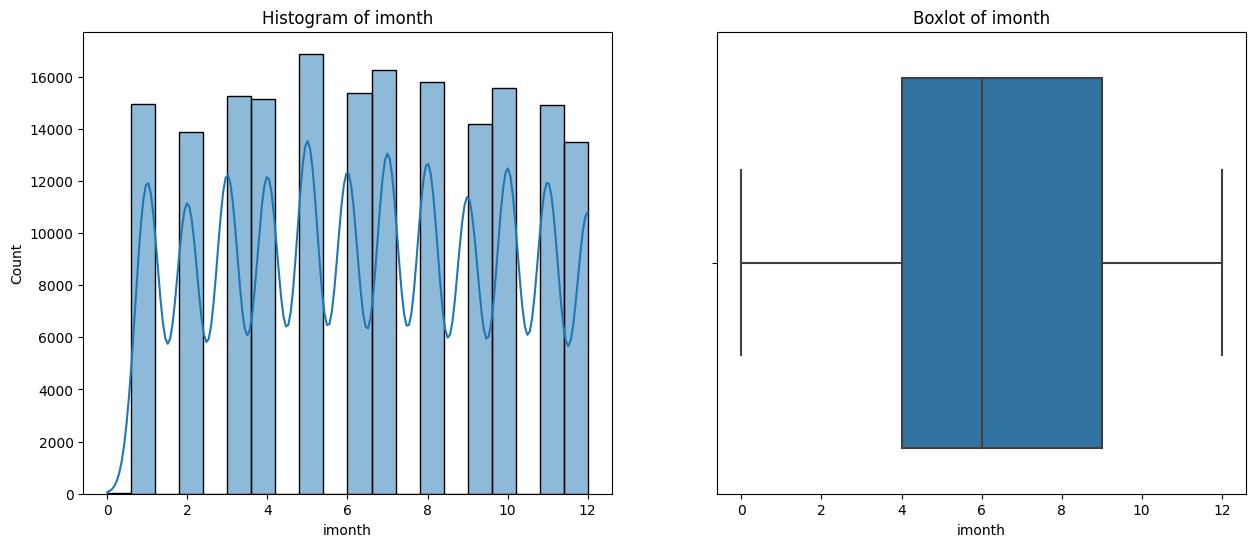

Description of iday
----------------------------------------------------------------------------
count   181691.00
mean        15.51
std          8.81
min          0.00
25%          8.00
50%         15.00
75%         23.00
max         31.00
Name: iday, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


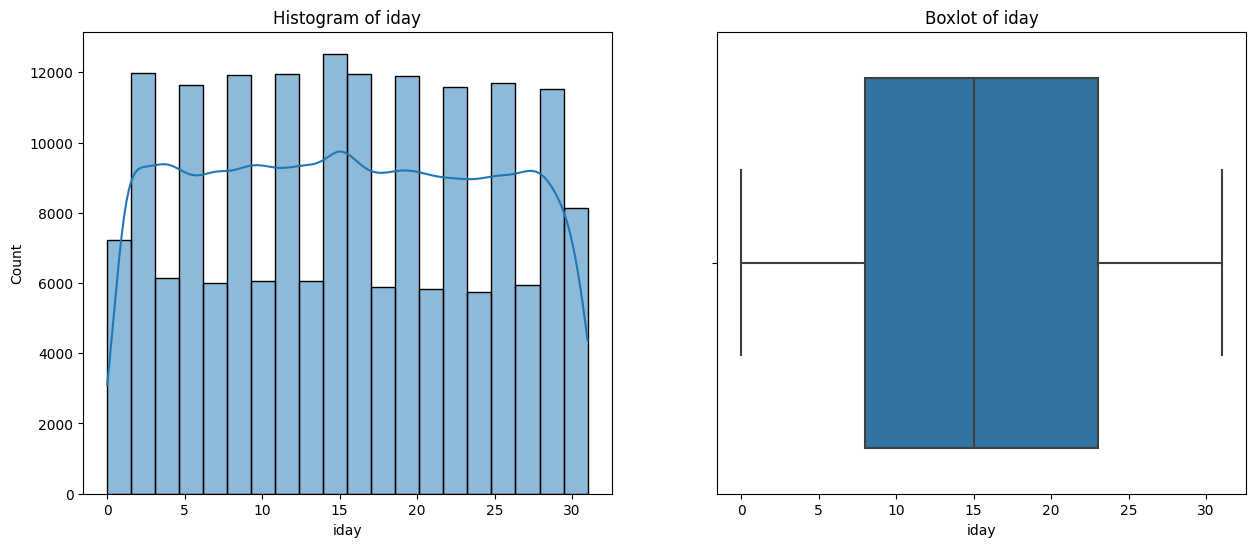

Description of extended
----------------------------------------------------------------------------
count   181691.00
mean         0.05
std          0.21
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: extended, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


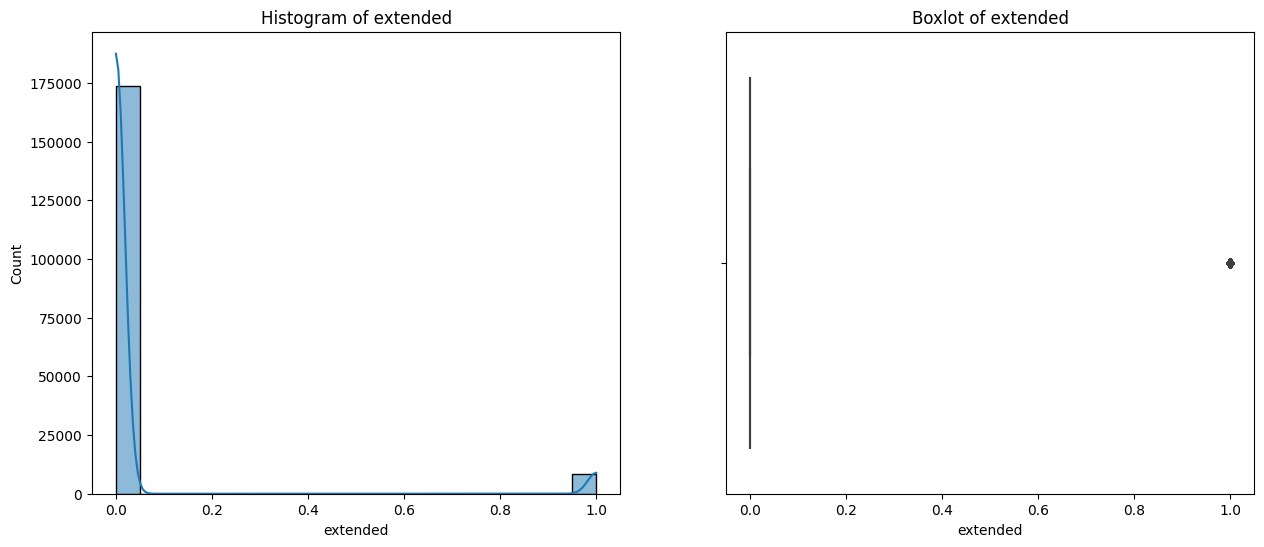

Description of country
----------------------------------------------------------------------------
count   181691.00
mean       131.97
std        112.41
min          4.00
25%         78.00
50%         98.00
75%        160.00
max       1004.00
Name: country, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


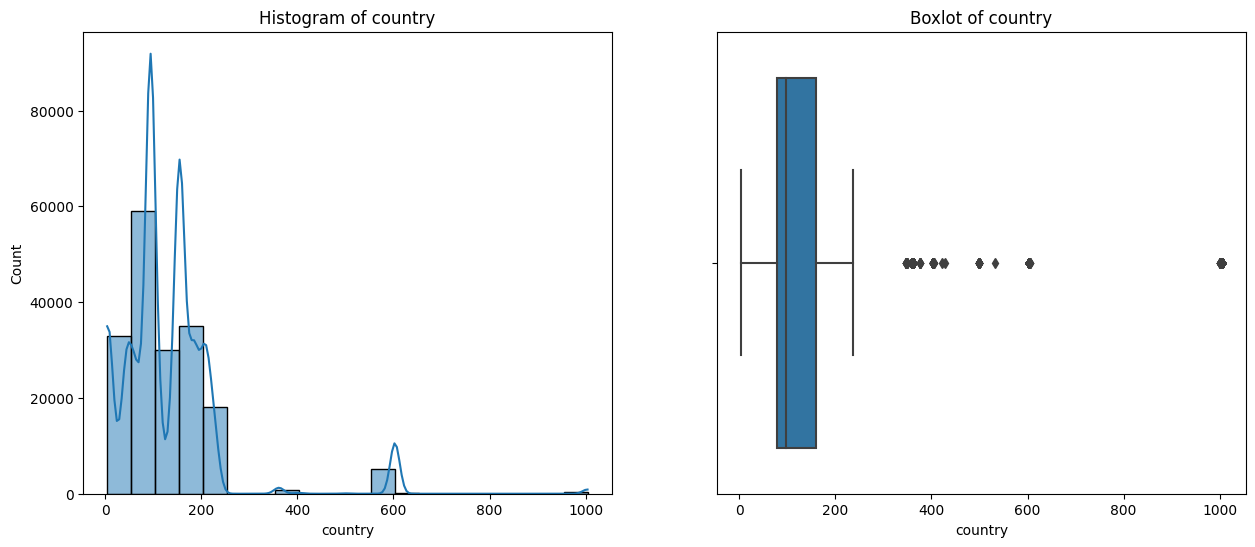

Description of region
----------------------------------------------------------------------------
count   181691.00
mean         7.16
std          2.93
min          1.00
25%          5.00
50%          6.00
75%         10.00
max         12.00
Name: region, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


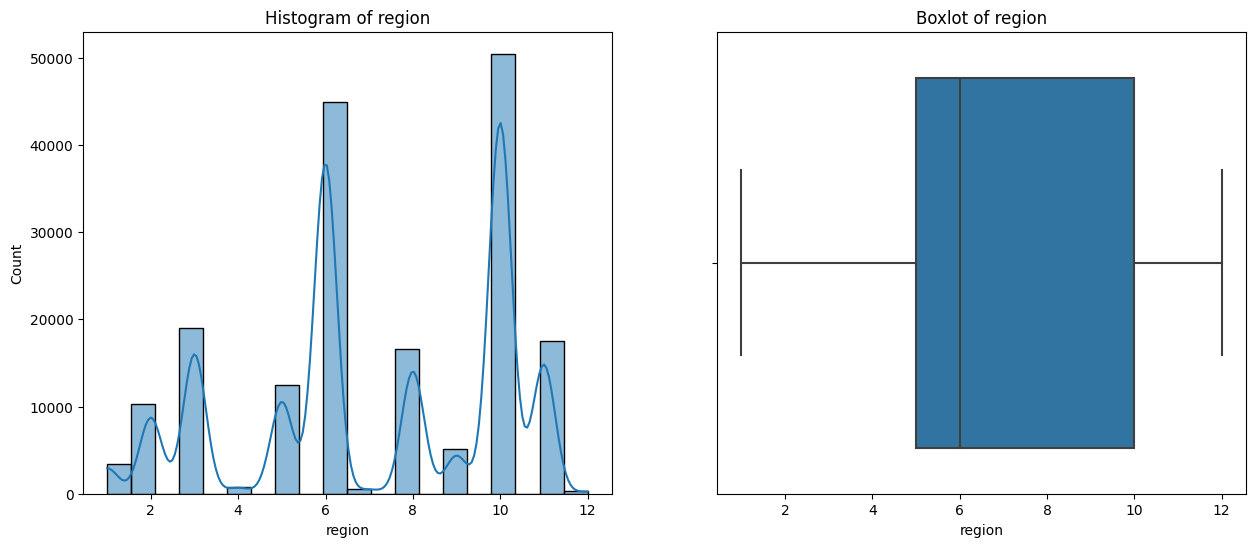

Description of latitude
----------------------------------------------------------------------------
count   177135.00
mean        23.50
std         18.57
min        -53.15
25%         11.51
50%         31.47
75%         34.69
max         74.63
Name: latitude, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


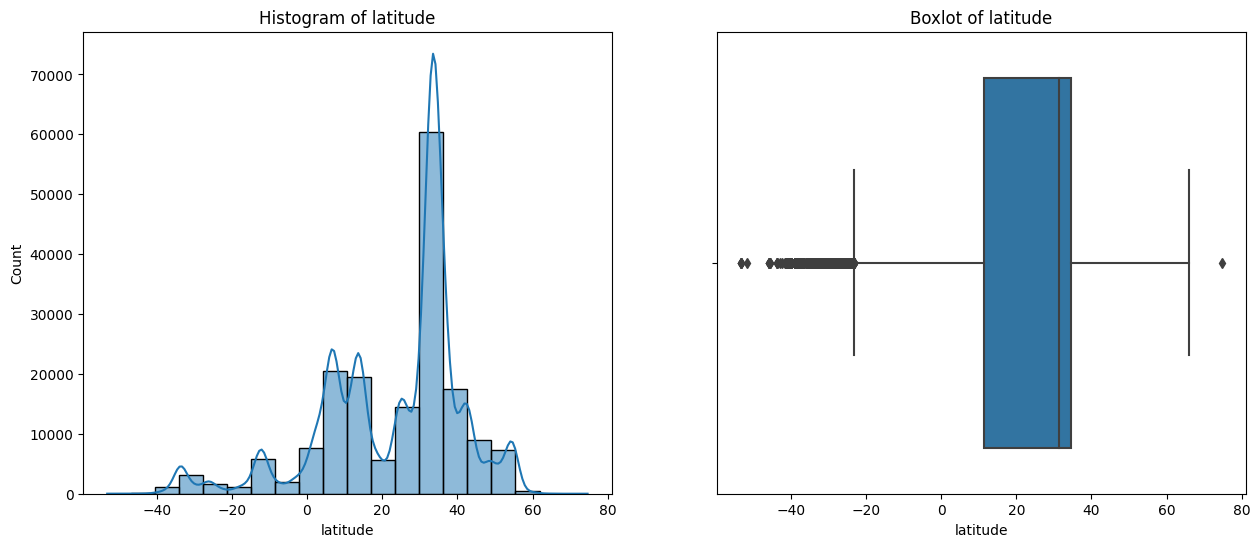

Description of longitude
----------------------------------------------------------------------------
count      177134.00
mean         -458.70
std        204778.99
min     -86185896.00
25%             4.55
50%            43.25
75%            68.71
max           179.37
Name: longitude, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


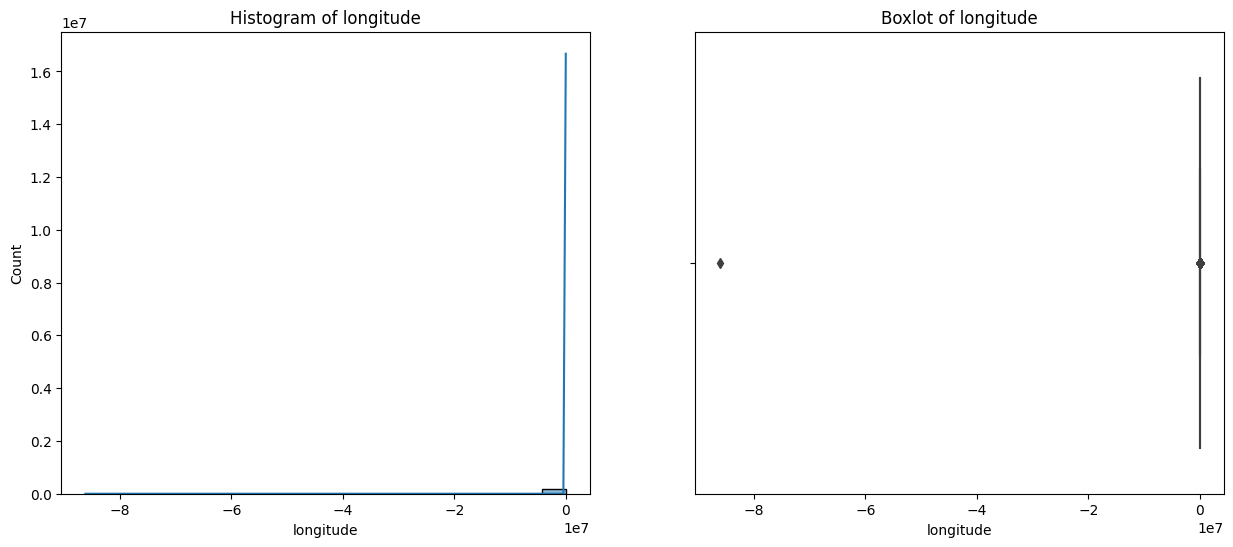

Description of specificity
----------------------------------------------------------------------------
count   181685.00
mean         1.45
std          1.00
min          1.00
25%          1.00
50%          1.00
75%          1.00
max          5.00
Name: specificity, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


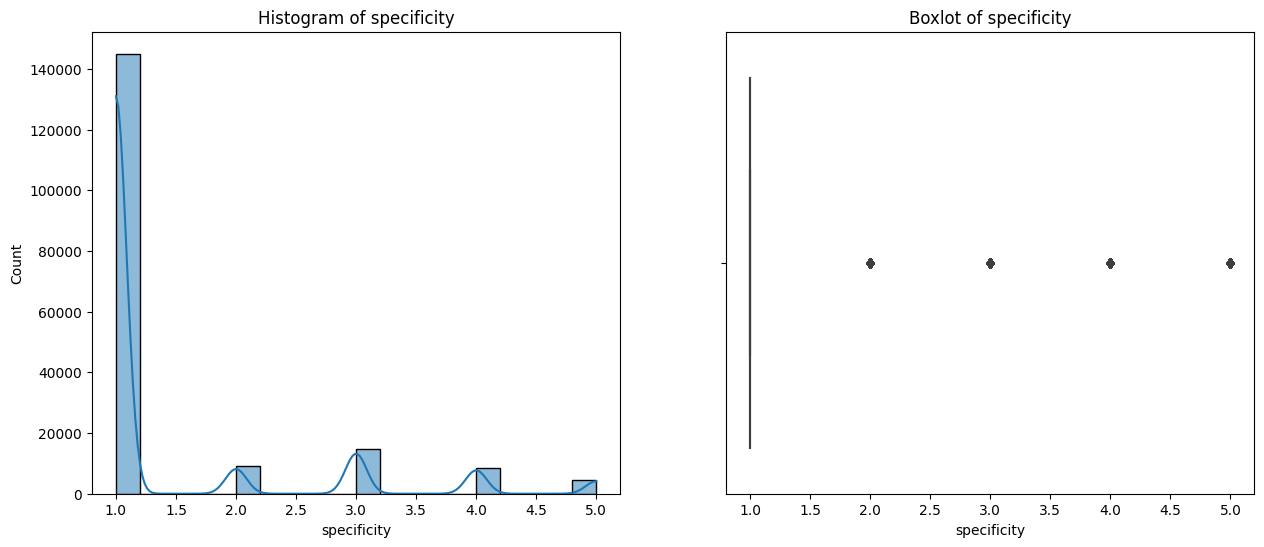

Description of crit1
----------------------------------------------------------------------------
count   181691.00
mean         0.99
std          0.11
min          0.00
25%          1.00
50%          1.00
75%          1.00
max          1.00
Name: crit1, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


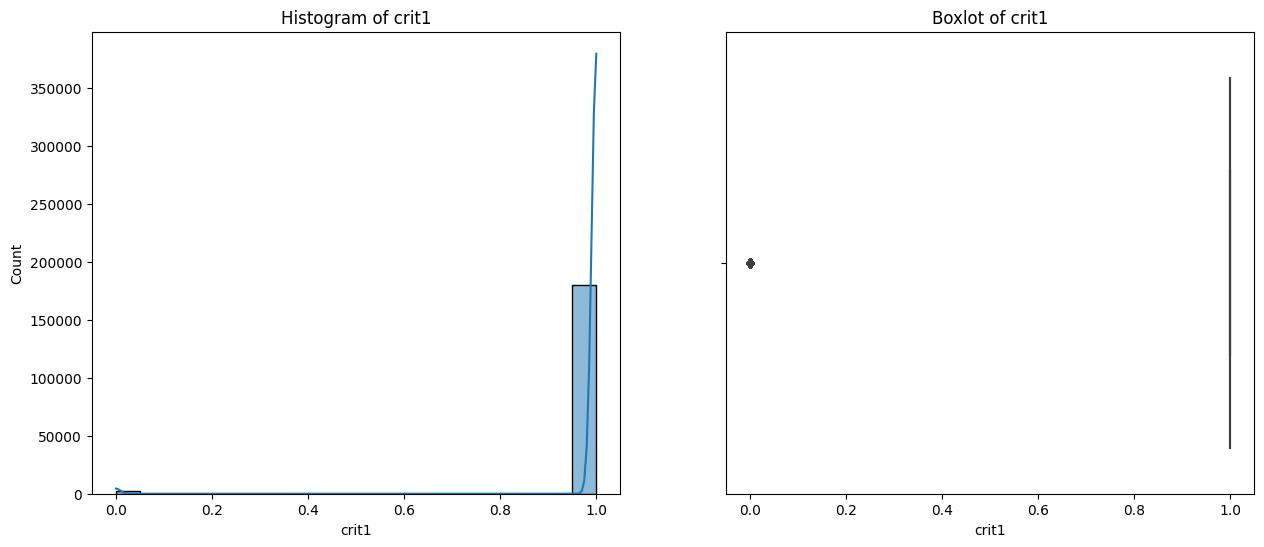

Description of targtype1
----------------------------------------------------------------------------
count   181691.00
mean         8.44
std          6.65
min          1.00
25%          3.00
50%          4.00
75%         14.00
max         22.00
Name: targtype1, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


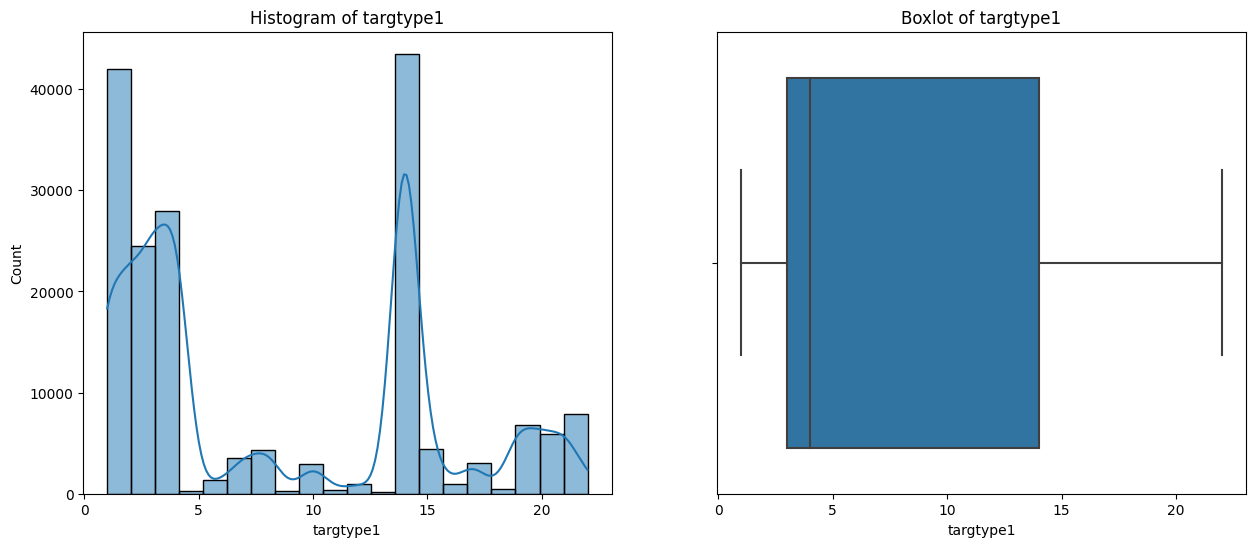

In [19]:
for x in df_num:
    univariateAnalysis_numeric(x,20)


In [20]:
# Defining function to plot bar & Treemap
def univariateAnalysis_category(cat_column):
    print(cat_column)
    print("----------------------------------------------------------------")
    value_counts = df_cat[cat_column].value_counts().sort_values(ascending=False).head(10) #Keeping for top 10 values
    num_categories = len(value_counts)
    figsize = (num_categories * 1, 4)
    #bar plot
    plt.figure(figsize=figsize)
    ax = value_counts.plot.bar(title="Barplot of " + cat_column)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
    print()


approxdate
----------------------------------------------------------------


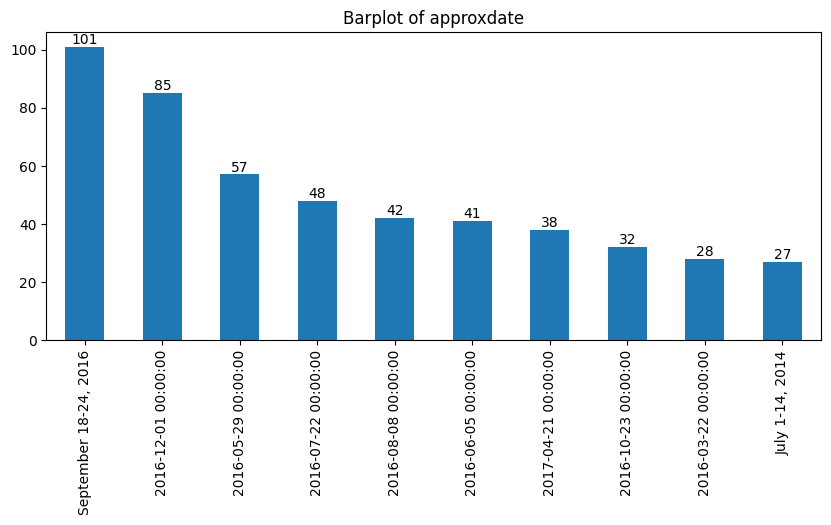


country_txt
----------------------------------------------------------------


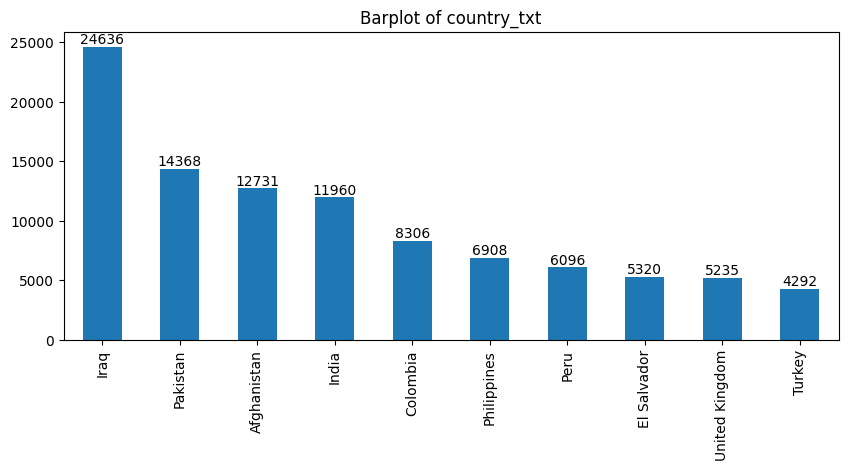


city
----------------------------------------------------------------


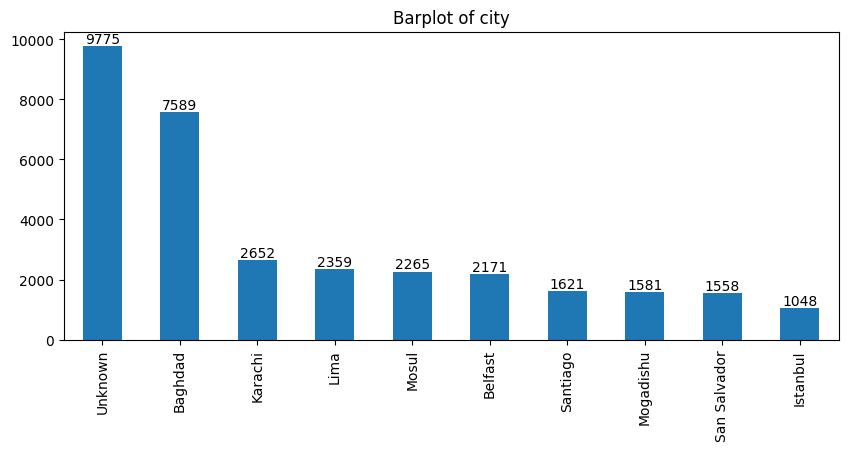


weapsubtype1_txt
----------------------------------------------------------------


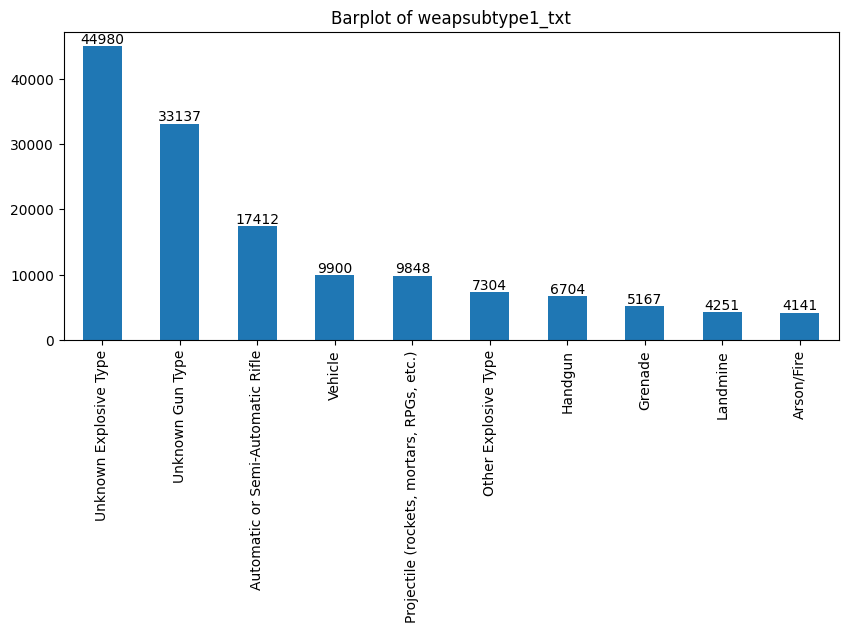

In [21]:
#Show the plots
for x in df_cat:
    univariateAnalysis_category(x)

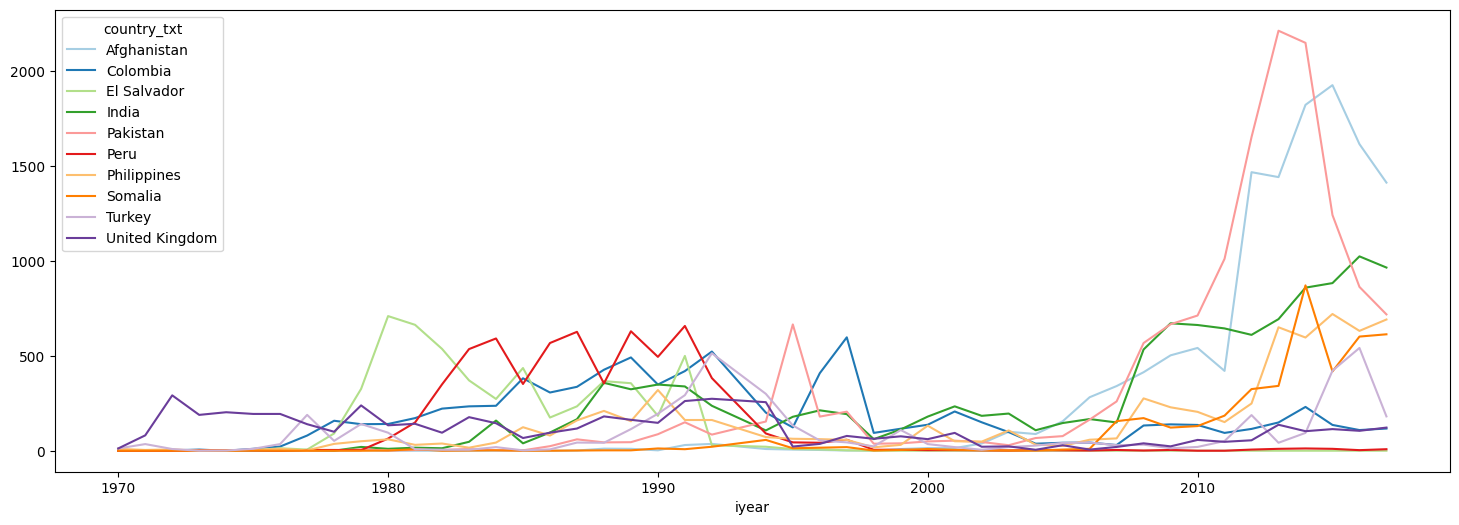

In [22]:
top_groups10=df[df['country_txt'].isin(df['country_txt'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.country_txt).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


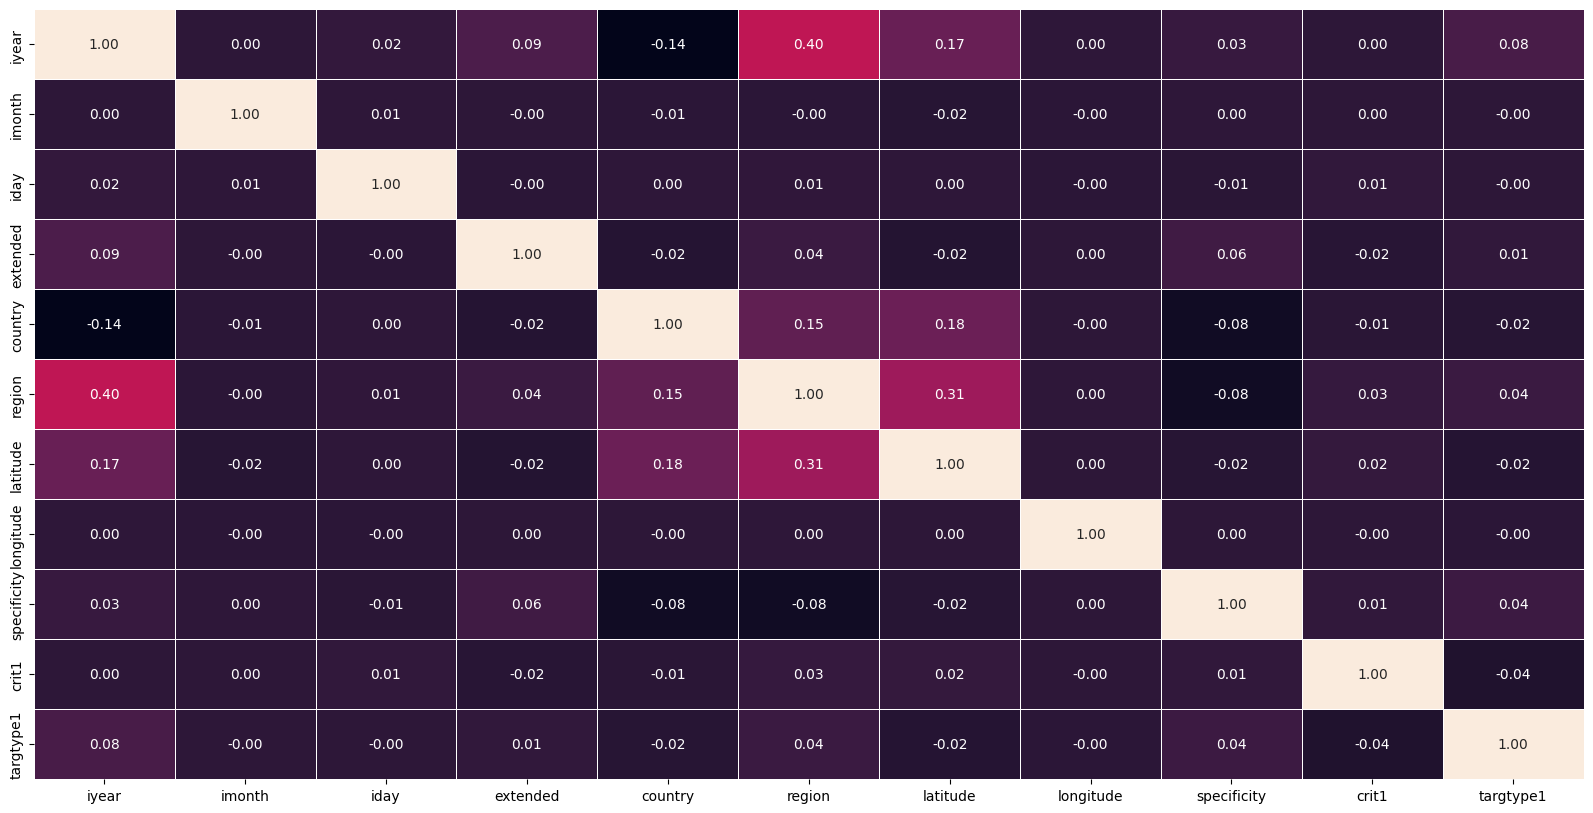

In [24]:
#Correlation heatmap
corr = df.corr(method='pearson')
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f', cbar=None, linewidth=0.5)
plt.show()
